In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# 고객 Demo 정보

In [2]:
demo = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_01_DEMO.csv', encoding = 'utf-8', delimiter = ',')

In [3]:
demo.rename(columns={'cust':'고객코드', 'ma_fem_dv':'성별', 'ages':'연령대', 'zon_hlv':'거주지대분류코드'},inplace=True)

In [4]:
demo['연령대'].value_counts()

40대    9863
30대    7736
50대    5633
20대    3853
60대    2115
70대     713
Name: 연령대, dtype: int64

In [5]:
demo['성별'].value_counts()

여성    20083
남성     9830
Name: 성별, dtype: int64

In [6]:
demo

,고객코드,성별,연령대,거주지대분류코드
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17
...,...,...,...,...
29908,M999708287,여성,40대,Z10
29909,M999770689,여성,30대,Z16
29910,M999849895,여성,20대,Z04
29911,M999926092,남성,30대,Z08


# 상품 구매 정보 - pdde

In [7]:
pdde = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_02_PDDE.csv', encoding = 'utf-8', delimiter = ',')

In [8]:
pdde.rename(columns = {'cust':'고객코드', 'rct_no':'장바구니식별번호', 'chnl_dv':'채널구분', 'cop_c':'제휴사', 'br_c':'점포코드', 'pd_c':'상품코드', 'de_dt':'상품 구매일자', 'de_hr':'상품 구매시간', 'buy_am':'상품 구매금액', 'buy_ct':'상품 구매수량'}, inplace=True)

In [9]:
pdde

,고객코드,장바구니식별번호,채널구분,제휴사,점포코드,상품코드,상품 구매일자,상품 구매시간,상품 구매금액,상품 구매수량
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


In [13]:
pdde[(pdde['채널구분'] == 2)]

,고객코드,장바구니식별번호,채널구분,제휴사,점포코드,상품코드,상품 구매일자,상품 구매시간,상품 구매금액,상품 구매수량
424,M533330698,E01000012036,2,A01,NaN,PD0954,20210101,1,39000.0,1
425,M661395471,E01000013847,2,A01,NaN,PD1706,20210101,10,168000.0,1
426,M594992791,E01000014987,2,A01,NaN,PD1810,20210101,11,30000.0,1
427,M263406446,E01000015117,2,A01,NaN,PD0302,20210101,12,335000.0,1
428,M182645944,E01000016766,2,A01,NaN,PD1782,20210101,13,107100.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


In [12]:
pdde[(pdde['채널구분'] == 2) & (pdde['점포코드'].isna() == True)]

,고객코드,장바구니식별번호,채널구분,제휴사,점포코드,상품코드,상품 구매일자,상품 구매시간,상품 구매금액,상품 구매수량
424,M533330698,E01000012036,2,A01,NaN,PD0954,20210101,1,39000.0,1
425,M661395471,E01000013847,2,A01,NaN,PD1706,20210101,10,168000.0,1
426,M594992791,E01000014987,2,A01,NaN,PD1810,20210101,11,30000.0,1
427,M263406446,E01000015117,2,A01,NaN,PD0302,20210101,12,335000.0,1
428,M182645944,E01000016766,2,A01,NaN,PD1782,20210101,13,107100.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


# 서비스 구매정보 - copu

In [10]:
copu = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_03_COP_U.csv', encoding = 'utf-8', delimiter = ',')

In [8]:
copu.rename(columns = {'cust':'고객코드', 'rct_no':'영수증번호', 'chnl_dv':'채널구분', 'cop_c':'제휴사', 'br_c':'점포코드', 'pd_c':'상품코드', 'de_dt':'제휴사 이용일자', 'vst_dt':'제휴사 방문일자', 'de_hr':'제휴사 이용시간', 'buy_am':'제휴사 이용금액'}, inplace=True)

In [9]:
copu

,고객코드,영수증번호,제휴사,점포코드,채널구분,제휴사 이용일자,제휴사 방문일자,제휴사 이용시간,제휴사 이용금액
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500
...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000


# 상품 분류 정보

In [107]:
clac = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_04_PD_CLAC.csv', encoding = 'utf-8', delimiter = ',')

In [108]:
clac.rename(columns = {'pd_c':'상품코드','pd_nm':'상품 소분류명', 'clac_hlv_nm':'상품 중분류명','clac_mcls_nm':'상품 대분류명'},inplace=True)

In [109]:
clac

,상품코드,상품 소분류명,상품 중분류명,상품 대분류명
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구
...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수
1929,PD1930,남성향수,화장품/뷰티케어,향수
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수
1931,PD1932,남성향수세트,화장품/뷰티케어,향수


# 점포정보

In [110]:
br = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_05_BR.csv', encoding = 'utf-8', delimiter = ',')

In [111]:
br.rename(columns = {'br_c':'점포코드', 'cop_c':'제휴사', 'zon_hlv':'점포지역대분류코드','zon_mcls':'점포지역중분류코드'},inplace=True)

In [112]:
br['제휴사'].unique()

array(['A01', 'A02', 'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01',
       'D02', 'E01'], dtype=object)

In [113]:
br

,점포코드,제휴사,점포지역대분류코드,점포지역중분류코드
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005
...,...,...,...,...
8803,E010040,E01,Z17,Z17024
8804,E010041,E01,Z16,Z16005
8805,E010042,E01,Z17,Z17021
8806,E010043,E01,Z10,Z10035


# L.Pay 이용

In [10]:
lpay = pd.read_csv('C:/Users/wnrrh/Desktop/태준/롯데멤버스/LPOINT_BIG_COMP_06_LPAY.csv', encoding = 'utf-8', delimiter = ',')

In [11]:
lpay.rename(columns = {'cust':'고객코드','rct_no':'영수증번호', 'cop_c':'제휴사', 'chnl_dv':'채널구분','de_dt':'엘페이 이용일자', 'de_hr':'엘페이 이용시간', 'buy_am':'엘페이 이용금액'},inplace=True)

In [12]:
lpay

,고객코드,영수증번호,제휴사,채널구분,엘페이 이용일자,엘페이 이용시간,엘페이 이용금액
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500
...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800
353180,M470112503,210104210652271,A06,2,20210104,21,6440
353181,M748878049,210119200278240,A02,1,20210119,20,17600
353182,M748878049,210119180267206,A02,1,20210119,18,12400


# pdde에 상품 분류정보, 점포 정보 mapping 

In [117]:
clac[clac['상품코드'].isin(pdde['상품코드'] == False)]

,상품코드,상품 소분류명,상품 중분류명,상품 대분류명


In [118]:
pdde[pdde['상품코드'].isin(clac['상품코드'] == False)]

,고객코드,장바구니식별번호,채널구분,제휴사,점포코드,상품코드,상품 구매일자,상품 구매시간,상품 구매금액,상품 구매수량


## 상품 분류 정보에 모든 상품 코드가 pdde에 들어가는 것을 확인

In [119]:
pdde = pd.merge(pdde,clac, on = ['상품코드'],how = 'left')
pdde

,고객코드,장바구니식별번호,채널구분,제휴사,점포코드,상품코드,상품 구매일자,상품 구매시간,상품 구매금액,상품 구매수량,상품 소분류명,상품 중분류명,상품 대분류명
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권


## 점포 정보에 모든 점포 코드가 pdde에 들어가는 것을 확인                                                            단, 제휴사 A (유통사만 포함)

In [120]:
pdde[pdde['점포코드'].isin(br['점포코드']) == False]

,고객코드,장바구니식별번호,채널구분,제휴사,점포코드,상품코드,상품 구매일자,상품 구매시간,상품 구매금액,상품 구매수량,상품 소분류명,상품 중분류명,상품 대분류명
424,M533330698,E01000012036,2,A01,NaN,PD0954,20210101,1,39000.0,1,여성스웨터/풀오버,여성의류,여성의류상의
425,M661395471,E01000013847,2,A01,NaN,PD1706,20210101,10,168000.0,1,남성백팩,패션잡화,남성가방
426,M594992791,E01000014987,2,A01,NaN,PD1810,20210101,11,30000.0,1,남성장갑,패션잡화,장갑
427,M263406446,E01000015117,2,A01,NaN,PD0302,20210101,12,335000.0,1,남성패딩,남성의류,남성의류아우터
428,M182645944,E01000016766,2,A01,NaN,PD1782,20210101,13,107100.0,1,여성스니커즈,패션잡화,여성화
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권


In [121]:
br[br['점포코드'].isin(pdde['점포코드']) == False]

,점포코드,제휴사,점포지역대분류코드,점포지역중분류코드
6755,B010001,B01,Z17,Z17001
6756,B010002,B01,Z17,Z17024
6757,B010003,B01,Z17,Z17013
6758,B010004,B01,Z01,Z01014
6759,B010005,B01,Z17,Z17007
...,...,...,...,...
8803,E010040,E01,Z17,Z17024
8804,E010041,E01,Z16,Z16005
8805,E010042,E01,Z17,Z17021
8806,E010043,E01,Z10,Z10035


In [123]:
pdde = pd.merge(pdde,br, on = ['점포코드','제휴사'], how = 'left')
pdde

,고객코드,장바구니식별번호,채널구분,제휴사,점포코드,상품코드,상품 구매일자,상품 구매시간,상품 구매금액,상품 구매수량,상품 소분류명,상품 중분류명,상품 대분류명,점포지역대분류코드_x,점포지역중분류코드_x,점포지역대분류코드_y,점포지역중분류코드_y
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,Z10,Z10042
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001,Z13,Z13001
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,Z10,Z10042
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,Z10,Z10042
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,Z10,Z10042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,NaN,NaN
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,NaN,NaN
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,NaN,NaN
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,NaN,NaN


In [124]:
pdde = pd.merge(pdde, demo, on = ['고객코드'], how = 'left')

In [125]:
pdde

,고객코드,장바구니식별번호,채널구분,제휴사,점포코드,상품코드,상품 구매일자,상품 구매시간,상품 구매금액,상품 구매수량,상품 소분류명,상품 중분류명,상품 대분류명,점포지역대분류코드_x,점포지역중분류코드_x,점포지역대분류코드_y,점포지역중분류코드_y,성별,연령대,거주지대분류코드
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,Z10,Z10042,여성,50대,Z17
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001,Z13,Z13001,여성,40대,Z13
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,Z10,Z10042,여성,50대,Z17
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,Z10,Z10042,여성,50대,Z17
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,Z10,Z10042,여성,50대,Z17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,NaN,NaN,남성,40대,Z10
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,NaN,NaN,남성,40대,Z10
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,NaN,NaN,남성,40대,Z10
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,NaN,NaN,남성,40대,Z10


# copu에 점포 정보 mapping

In [126]:
copu = pd.merge(copu,br, on=['제휴사', '점포코드'], how='left')

In [127]:
copu = pd.merge(demo, copu, on = ['고객코드'], how = 'right')

In [128]:
copu

,고객코드,성별,연령대,거주지대분류코드,영수증번호,제휴사,점포코드,채널구분,제휴사 이용일자,제휴사 방문일자,제휴사 이용시간,제휴사 이용금액,점포지역대분류코드,점포지역중분류코드
0,M839993508,남성,70대,Z17,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,Z17,Z17024
1,M839993508,남성,70대,Z17,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,Z17,Z17024
2,M839993508,남성,70대,Z17,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,Z17,Z17024
3,M839993508,남성,70대,Z17,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,Z17,Z17024
4,M839993508,남성,70대,Z17,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,Z17,Z17018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M058650684,여성,20대,Z10,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000,Z17,Z17018
248300,M058650684,여성,20대,Z10,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900,Z17,Z17018
248301,M014154595,여성,30대,Z12,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000,Z14,Z14005
248302,M510878172,남성,20대,Z17,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000,Z17,Z17013


# copu 전처리

In [129]:
copu

,고객코드,성별,연령대,거주지대분류코드,영수증번호,제휴사,점포코드,채널구분,제휴사 이용일자,제휴사 방문일자,제휴사 이용시간,제휴사 이용금액,점포지역대분류코드,점포지역중분류코드
0,M839993508,남성,70대,Z17,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,Z17,Z17024
1,M839993508,남성,70대,Z17,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,Z17,Z17024
2,M839993508,남성,70대,Z17,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,Z17,Z17024
3,M839993508,남성,70대,Z17,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,Z17,Z17024
4,M839993508,남성,70대,Z17,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,Z17,Z17018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M058650684,여성,20대,Z10,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000,Z17,Z17018
248300,M058650684,여성,20대,Z10,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900,Z17,Z17018
248301,M014154595,여성,30대,Z12,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000,Z14,Z14005
248302,M510878172,남성,20대,Z17,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000,Z17,Z17013


In [130]:
for i in copu.index:
    if copu.loc[i,'제휴사 이용일자'] == copu.loc[i,'제휴사 방문일자'] : 
        copu.loc[i,'check'] = 1
    else : 
        copu.loc[i, 'check'] = 0
copu

,고객코드,성별,연령대,거주지대분류코드,영수증번호,제휴사,점포코드,채널구분,제휴사 이용일자,제휴사 방문일자,제휴사 이용시간,제휴사 이용금액,점포지역대분류코드,점포지역중분류코드,check
0,M839993508,남성,70대,Z17,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,Z17,Z17024,1.0
1,M839993508,남성,70대,Z17,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,Z17,Z17024,1.0
2,M839993508,남성,70대,Z17,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,Z17,Z17024,1.0
3,M839993508,남성,70대,Z17,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,Z17,Z17024,1.0
4,M839993508,남성,70대,Z17,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,Z17,Z17018,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M058650684,여성,20대,Z10,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000,Z17,Z17018,1.0
248300,M058650684,여성,20대,Z10,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900,Z17,Z17018,1.0
248301,M014154595,여성,30대,Z12,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000,Z14,Z14005,1.0
248302,M510878172,남성,20대,Z17,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000,Z17,Z17013,1.0


In [131]:
copu.check.value_counts()

1.0    232732
0.0     15572
Name: check, dtype: int64

# 최종 상품구매정보, 제휴사 이용정보, 엘페이 3가지 테이블로 일단 EDA

In [132]:
# 연령대 형태 변환
def change_age(text:str):
    return text[:2]

copu['연령대'] = copu['연령대'].map(change_age).astype(int)
pdde['연령대'] = pdde['연령대'].map(change_age).astype(int)

## 상품구매정보 - 성별에 따른 이용금액 및 이용건수 EDA

In [133]:
# 한글꺠지는 것 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

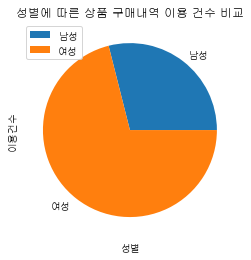

In [134]:
# 이용 건수
x = pdde.groupby(by='성별').sum().index
y = pdde.groupby(by='성별').count()['고객코드']
plt.title('성별에 따른 상품 구매내역 이용 건수 비교')
plt.xlabel('성별')
plt.ylabel('이용건수')
plt.pie(y, labels=x.values)
plt.legend()
plt.show()

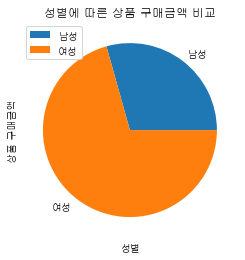

In [135]:
# 이용 금액
x = pdde.groupby(by='성별').sum().index
y = pdde.groupby(by='성별').sum()['상품 구매금액']
plt.title('성별에 따른 상품 구매금액 비교')
plt.xlabel('성별')
plt.ylabel('상품 구매금액')
plt.pie(y, labels=x.values)
plt.legend()
plt.show()

In [136]:
# 전체적으로 남성에 비해 여성이 3배 가량 더 자주 이용하고, 더 큰 금액을 사용하는 편

## 상품구매정보 - 연령대에 따른 이용건수 및 이용금액 EDA

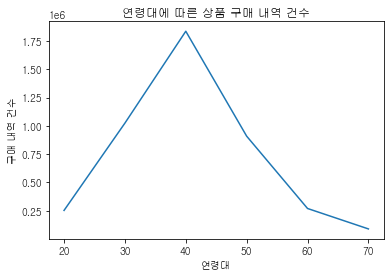

In [137]:
x = pdde.groupby(by='연령대').sum().index
y = pdde.groupby(by='연령대').count()['고객코드']
plt.title('연령대에 따른 상품 구매 내역 건수')
plt.xlabel('연령대')
plt.ylabel('구매 내역 건수')
plt.plot(x,y)
plt.show()

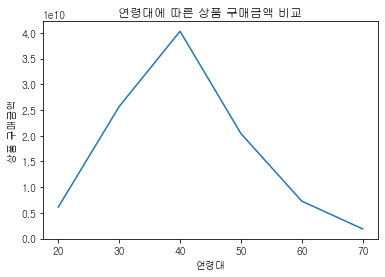

In [138]:
# 이용 금액
x = pdde.groupby(by='연령대').sum().index
y = pdde.groupby(by='연령대').sum()['상품 구매금액']
plt.title('연령대에 따른 상품 구매금액 비교')
plt.xlabel('연령대')
plt.ylabel('상품 구매금액')
plt.plot(x, y)
plt.show()

In [142]:
# 40대, 30대, 50대, 20대, 60대, 70대 순서로 상품을 구매함

## 시간대별 상품 이용금액 및 상품 구매건수 EDA

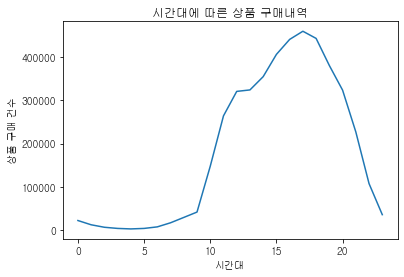

In [143]:
x = pdde.groupby(by='상품 구매시간').sum().index
y = pdde.groupby(by='상품 구매시간').count()['고객코드']
plt.title('시간대에 따른 상품 구매내역')
plt.xlabel('시간대')
plt.ylabel('상품 구매 건수')
plt.plot(x,y)
plt.show()

In [144]:
df_copu = copu.copy()
df_pdde = pdde.copy()
df_lpay = lpay.copy()

In [145]:
df_copu.rename(columns = {'제휴사 이용일자':'이용일자'}, inplace=True)
df_lpay.rename(columns = {'엘페이 이용일자':'이용일자'}, inplace=True)

In [147]:
pdde

,고객코드,장바구니식별번호,채널구분,제휴사,점포코드,상품코드,상품 구매일자,상품 구매시간,상품 구매금액,상품 구매수량,상품 소분류명,상품 중분류명,상품 대분류명,점포지역대분류코드_x,점포지역중분류코드_x,점포지역대분류코드_y,점포지역중분류코드_y,성별,연령대,거주지대분류코드
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,Z10,Z10042,여성,50,Z17
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001,Z13,Z13001,여성,40,Z13
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,Z10,Z10042,여성,50,Z17
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,Z10,Z10042,여성,50,Z17
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,Z10,Z10042,여성,50,Z17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,NaN,NaN,남성,40,Z10
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,NaN,NaN,남성,40,Z10
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,NaN,NaN,남성,40,Z10
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,NaN,NaN,남성,40,Z10


In [146]:
lpay

,고객코드,영수증번호,제휴사,채널구분,엘페이 이용일자,엘페이 이용시간,엘페이 이용금액
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500
...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800
353180,M470112503,210104210652271,A06,2,20210104,21,6440
353181,M748878049,210119200278240,A02,1,20210119,20,17600
353182,M748878049,210119180267206,A02,1,20210119,18,12400


In [77]:
df_copu_merge = pd.merge(df_lpay, df_copu, on = ['고객코드', '제휴사', '채널구분', '이용일자'], how = 'right')
df_inner = pd.merge(df_lpay, df_copu, on = ['고객코드', '제휴사', '채널구분', '이용일자'], how = 'inner')

In [78]:
df_copu_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252741 entries, 0 to 252740
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   고객코드       252741 non-null  object 
 1   영수증번호_x    28177 non-null   float64
 2   제휴사        252741 non-null  object 
 3   채널구분       252741 non-null  int64  
 4   이용일자       252741 non-null  int64  
 5   엘페이 이용시간   28177 non-null   float64
 6   엘페이 이용금액   28177 non-null   float64
 7   성별         252741 non-null  object 
 8   연령대        252741 non-null  int32  
 9   거주지대분류코드   252741 non-null  object 
 10  영수증번호_y    252741 non-null  object 
 11  점포코드       252686 non-null  object 
 12  제휴사 방문일자   252741 non-null  int64  
 13  제휴사 이용시간   252741 non-null  int64  
 14  제휴사 이용금액   252741 non-null  int64  
 15  점포지역대분류코드  252686 non-null  object 
 16  점포지역중분류코드  252686 non-null  object 
 17  check      252741 non-null  float64
dtypes: float64(4), int32(1), int64(5), object(8)
memory usage: 35.7+

In [79]:
df_copu_merge

,고객코드,영수증번호_x,제휴사,채널구분,이용일자,엘페이 이용시간,엘페이 이용금액,성별,연령대,거주지대분류코드,영수증번호_y,점포코드,제휴사 방문일자,제휴사 이용시간,제휴사 이용금액,점포지역대분류코드,점포지역중분류코드,check
0,M839993508,NaN,B01,1,20211026,NaN,NaN,남성,70,Z17,21102612B015763935,B010012,20211026,12,60000,Z17,Z17024,1.0
1,M839993508,NaN,B01,1,20211106,NaN,NaN,남성,70,Z17,21110610B014219744,B010012,20211106,10,17100,Z17,Z17024,1.0
2,M839993508,NaN,B01,1,20210211,NaN,NaN,남성,70,Z17,21021112B013419710,B010012,20210211,12,136500,Z17,Z17024,1.0
3,M839993508,NaN,B01,1,20210920,NaN,NaN,남성,70,Z17,21092010B012637545,B010012,20210920,10,34200,Z17,Z17024,1.0
4,M839993508,NaN,D01,1,20211010,NaN,NaN,남성,70,Z17,21101009D015920171,D010614,20211010,9,2500,Z17,Z17018,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252736,M058650684,NaN,C02,1,20211116,NaN,NaN,여성,20,Z10,21111614C021426818,C020002,20211116,14,2000,Z17,Z17018,1.0
252737,M058650684,NaN,C02,1,20211116,NaN,NaN,여성,20,Z10,21111619C023223432,C020002,20211116,19,26900,Z17,Z17018,1.0
252738,M014154595,NaN,C01,2,20211212,NaN,NaN,여성,30,Z12,21121209C015324520,C010087,20211212,9,2000,Z14,Z14005,1.0
252739,M510878172,NaN,C01,2,20211127,NaN,NaN,남성,20,Z17,21112719C013369102,C010007,20211127,19,6000,Z17,Z17013,1.0


In [80]:
df_inner

,고객코드,영수증번호_x,제휴사,채널구분,이용일자,엘페이 이용시간,엘페이 이용금액,성별,연령대,거주지대분류코드,영수증번호_y,점포코드,제휴사 방문일자,제휴사 이용시간,제휴사 이용금액,점포지역대분류코드,점포지역중분류코드,check
0,M253450307,210803160182662,C01,2,20210803,16,1000,남성,30,Z17,21080316C014710167,C010019,20210805,16,1000,Z17,Z17005,0.0
1,M186539937,210803130266856,D02,1,20210803,13,9600,여성,40,Z16,21080313D022392308,D020157,20210803,13,9600,Z16,Z16007,1.0
2,M347475637,210803160182823,C01,2,20210803,16,1000,여성,50,Z17,21080316C015418708,C010013,20210805,16,1000,Z17,Z17020,0.0
3,M425728822,210803180296681,D02,1,20210803,18,10800,여성,30,Z10,21080318D020914000,D020241,20210803,18,10800,Z17,Z17006,1.0
4,M080720090,210803100153464,C01,2,20210803,10,14000,여성,40,Z17,21080310C015894407,C010011,20210803,10,9000,Z17,Z17018,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28172,M814893049,210127200143146,C01,2,20210127,20,24000,여성,40,Z17,21012720C011026237,C010011,20210129,20,24000,Z17,Z17018,0.0
28173,M795528458,210107180179964,D01,1,20210107,18,22460,여성,20,Z17,21010718D012427600,D011208,20210107,18,22460,Z17,Z17004,1.0
28174,M912818874,210122130120462,C01,2,20210122,13,6000,여성,40,Z13,21012213C014460643,C010121,20210122,13,6000,Z13,Z13001,1.0
28175,M688241278,210111170102296,D01,1,20210111,17,4400,남성,40,Z17,21011117D010946145,D011085,20210111,17,4400,Z10,Z10011,1.0


In [66]:
df_copu[(df_copu['고객코드'] == 'M253450307') & (df_copu['이용일자'] == 20210803)]

,고객코드,성별,연령대,거주지대분류코드,영수증번호,제휴사,점포코드,채널구분,이용일자,제휴사 방문일자,제휴사 이용시간,제휴사 이용금액,점포지역대분류코드,점포지역중분류코드,check
91921,M253450307,남성,30,Z17,21080316C014710167,C01,C010019,2,20210803,20210805,16,1000,Z17,Z17005,0.0


In [67]:
df_lpay[(df_lpay['고객코드'] == 'M253450307') & (df_lpay['이용일자'] == 20210803)]

,고객코드,영수증번호,제휴사,채널구분,이용일자,엘페이 이용시간,엘페이 이용금액
6,M253450307,210803160182662,C01,2,20210803,16,1000


In [70]:
df_copu

,고객코드,성별,연령대,거주지대분류코드,영수증번호,제휴사,점포코드,채널구분,이용일자,제휴사 방문일자,제휴사 이용시간,제휴사 이용금액,점포지역대분류코드,점포지역중분류코드,check
0,M839993508,남성,70,Z17,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,Z17,Z17024,1.0
1,M839993508,남성,70,Z17,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,Z17,Z17024,1.0
2,M839993508,남성,70,Z17,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,Z17,Z17024,1.0
3,M839993508,남성,70,Z17,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,Z17,Z17024,1.0
4,M839993508,남성,70,Z17,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,Z17,Z17018,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M058650684,여성,20,Z10,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000,Z17,Z17018,1.0
248300,M058650684,여성,20,Z10,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900,Z17,Z17018,1.0
248301,M014154595,여성,30,Z12,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000,Z14,Z14005,1.0
248302,M510878172,남성,20,Z17,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000,Z17,Z17013,1.0


In [49]:
lpay['제휴사'].value_counts()

A06    93869
L01    70939
A01    54026
A02    31778
A04    29243
L00    22526
A03    16477
D01    13101
C01    11321
D02     4250
A05     2604
C02     1809
B01      769
E01      472
Name: 제휴사, dtype: int64

In [50]:
## 엘페이는 유통사, 렌탈이 많은 편 

In [82]:
df_lpay

,고객코드,영수증번호,제휴사,채널구분,이용일자,엘페이 이용시간,엘페이 이용금액
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500
...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800
353180,M470112503,210104210652271,A06,2,20210104,21,6440
353181,M748878049,210119200278240,A02,1,20210119,20,17600
353182,M748878049,210119180267206,A02,1,20210119,18,12400


In [84]:
df_pdde

,고객코드,장바구니식별번호,채널구분,제휴사,점포코드,상품코드,이용일자,상품 구매시간,상품 구매금액,상품 구매수량,상품 소분류명,상품 중분류명,상품 대분류명,점포지역대분류코드,점포지역중분류코드,성별,연령대,거주지대분류코드
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50,Z17
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001,여성,40,Z13
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50,Z17
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50,Z17
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50,Z17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,남성,40,Z10
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,남성,40,Z10
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,남성,40,Z10
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,남성,40,Z10


In [85]:
df_pdde.rename(columns = {'상품 구매일자':'이용일자'},inplace=True)

In [86]:
df_pdde_merge = pd.merge(df_lpay, df_pdde, on = ['고객코드', '제휴사', '채널구분', '이용일자'], how = 'right')

In [88]:
df_pdde_merge.head(4)

,고객코드,영수증번호,제휴사,채널구분,이용일자,엘페이 이용시간,엘페이 이용금액,장바구니식별번호,점포코드,상품코드,...,상품 구매금액,상품 구매수량,상품 소분류명,상품 중분류명,상품 대분류명,점포지역대분류코드,점포지역중분류코드,성별,연령대,거주지대분류코드
0,M430112881,NaN,A01,1,20210101,NaN,NaN,A01000001113,A010039,PD0290,...,15000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50,Z17
1,M646853852,NaN,A01,1,20210101,NaN,NaN,A01000002265,A010025,PD1369,...,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001,여성,40,Z13
2,M430112881,NaN,A01,1,20210101,NaN,NaN,A01000003148,A010039,PD0290,...,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50,Z17
3,M430112881,NaN,A01,1,20210101,NaN,NaN,A01000003148,A010039,PD0290,...,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50,Z17


In [93]:
df_pdde_merge.loc[10]

고객코드           M886923095
영수증번호                 NaN
제휴사                   A01
채널구분                    1
이용일자             20210101
엘페이 이용시간              NaN
엘페이 이용금액              NaN
장바구니식별번호     A01000010063
점포코드              A010039
상품코드               PD1181
상품 구매시간                11
상품 구매금액            5200.0
상품 구매수량                 1
상품 소분류명              커피음료
상품 중분류명                음료
상품 대분류명              커피음료
점포지역대분류코드             Z10
점포지역중분류코드          Z10042
성별                     여성
연령대                    40
거주지대분류코드              Z17
Name: 10, dtype: object

In [37]:
copu[copu['고객코드'] == 'M216016456']

,고객코드,영수증번호,제휴사,점포코드,채널구분,제휴사 이용일자,제휴사 방문일자,제휴사 이용시간,제휴사 이용금액,점포지역대분류코드,점포지역중분류코드,check
100394,M216016456,21022415D010639779,D01,D010661,1,20210224,20210224,15,3700,Z14,Z14007,1.0
100395,M216016456,21050219D011072467,D01,D011288,1,20210502,20210502,19,7800,Z14,Z14007,1.0
100396,M216016456,21101014D010539137,D01,D011084,1,20211010,20211010,14,3900,Z12,Z12011,1.0
100397,M216016456,21050514D012578653,D01,D010661,1,20210505,20210505,14,7800,Z14,Z14007,1.0
100398,M216016456,21051916D011130666,D01,D011288,1,20210519,20210519,16,3700,Z14,Z14007,1.0
224286,M216016456,21010716D015810054,D01,D010661,1,20210107,20210107,16,12000,Z14,Z14007,1.0
224287,M216016456,21070414D011613261,D01,D010252,1,20210704,20210704,14,15600,Z14,Z14003,1.0
224288,M216016456,21022415D013434767,D01,D010661,1,20210224,20210224,15,3700,Z14,Z14007,1.0
224289,M216016456,21100315D014953006,D01,D010239,1,20211003,20211003,15,5300,Z14,Z14007,1.0
224290,M216016456,21051916D012320056,D01,D011288,1,20210519,20210519,16,2000,Z14,Z14007,1.0


In [39]:
pdde

,고객코드,장바구니식별번호,채널구분,제휴사,점포코드,상품코드,상품 구매일자,상품 구매시간,상품 구매금액,상품 구매수량,상품 소분류명,상품 중분류명,상품 대분류명,점포지역대분류코드,점포지역중분류코드,성별,연령대,거주지대분류코드
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50대,Z17
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001,여성,40대,Z13
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50대,Z17
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50대,Z17
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,Z10,Z10042,여성,50대,Z17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,남성,40대,Z10
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,남성,40대,Z10
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,남성,40대,Z10
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,NaN,NaN,남성,40대,Z10


In [148]:
df_copu['제휴사'].unique()

array(['B01', 'D01', 'C01', 'D02', 'C02', 'E01'], dtype=object)

In [149]:
df_copu['제휴사'].unique()

array(['B01', 'D01', 'C01', 'D02', 'C02', 'E01'], dtype=object)

In [151]:
df_lpay['제휴사'].unique()

array(['A03', 'L01', 'A02', 'A06', 'A01', 'C01', 'D02', 'A04', 'L00',
       'D01', 'A05', 'C02', 'E01', 'B01'], dtype=object)

In [16]:
pdde['타입'] = 'Product'

In [17]:
pdde

,고객코드,장바구니식별번호,채널구분,제휴사,점포코드,상품코드,상품 구매일자,상품 구매시간,상품 구매금액,상품 구매수량,타입
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,Product
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,Product
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,Product
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,Product
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,Product
...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,Product
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,Product
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,Product
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,Product


In [22]:
copu.drop(['제휴사 방문일자'], axis=1, inplace=True)

In [23]:
copu['상품코드'] = 0

,고객코드,영수증번호,제휴사,점포코드,채널구분,제휴사 이용일자,제휴사 이용시간,제휴사 이용금액,타입
0,M839993508,21102612B015763935,B01,B010012,1,20211026,12,60000,제휴사
1,M839993508,21110610B014219744,B01,B010012,1,20211106,10,17100,제휴사
2,M839993508,21021112B013419710,B01,B010012,1,20210211,12,136500,제휴사
3,M839993508,21092010B012637545,B01,B010012,1,20210920,10,34200,제휴사
4,M839993508,21101009D015920171,D01,D010614,1,20211010,9,2500,제휴사
...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,14,2000,제휴사
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,19,26900,제휴사
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,9,2000,제휴사
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,19,6000,제휴사


In [18]:
copu['타입'] = '제휴사'

In [19]:
lpay['타입'] = 'Lpay'

In [20]:
lpay['상품코드'] = 0
lpay['점포코드'] = 0
lpay['상품 구매수량'] = 0

,고객코드,영수증번호,제휴사,채널구분,엘페이 이용일자,엘페이 이용시간,엘페이 이용금액,타입
0,M629656521,210803210311226,A03,1,20210803,21,10900,Lpay
1,M216016456,210803130167542,L01,2,20210803,13,6860,Lpay
2,M205142844,210803140275112,A02,1,20210803,14,9000,Lpay
3,M737010483,210803040637594,A06,2,20210803,4,36740,Lpay
4,M707775545,210803140675502,A06,2,20210803,14,138500,Lpay
...,...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800,Lpay
353180,M470112503,210104210652271,A06,2,20210104,21,6440,Lpay
353181,M748878049,210119200278240,A02,1,20210119,20,17600,Lpay
353182,M748878049,210119180267206,A02,1,20210119,18,12400,Lpay
